In [1]:
import os
import keras
import numpy as np
import pandas as pd
from glob import glob
import tensorflow as tf
import tensorflow.image as tfi

# Data
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

# Data Viz
import matplotlib.pyplot as plt

In [2]:
RANDOM_STATE = 42
RUN = 'run0'

In [3]:
def load_image(image, SIZE):
    return np.round(tfi.resize(img_to_array(load_img(image)), (SIZE, SIZE)), 4)

def load_images(image_paths, SIZE, mask=False, trim=None):
    if trim is not None:
        image_paths = image_paths[:trim]
    
    if mask:
        images = np.zeros(shape=(len(image_paths), SIZE, SIZE, 1))
    else:
        images = np.zeros(shape=(len(image_paths), SIZE, SIZE, 3))
    
    for i,image in enumerate(image_paths):
        img = tf.cast(load_image(image, SIZE), tf.float32) / 255.0
        if mask:
            images[i] = img[:,:,:1]
        else:
            images[i] = img
    
    return images

In [4]:
def show_image(image, title=None, cmap=None, alpha=1):
    plt.imshow(image, cmap=cmap, alpha=alpha)
    if title is not None:
        plt.title(title)
    plt.axis('off')

def show_mask(image, mask, cmap=None, alpha=0.4):
    plt.imshow(image)
    plt.imshow(tf.squeeze(mask), cmap=cmap, alpha=alpha)
    plt.axis('off')

In [5]:
SIZE = 64

In [6]:
root_path = './dataset_ori/'
classes = sorted(os.listdir(root_path))
classes

['Apple_Gala',
 'Apple_Golden Delicious',
 'Banana',
 'Mango Golden Queen',
 'Mango_Alphonso',
 'Mango_Amrapali',
 'Mango_Bari',
 'Mango_Himsagar',
 'Orange',
 'Palm',
 'Persimmon',
 'Pomegranate',
 'White Pear']

In [7]:
image_paths = []
mask_paths = []

for c in classes:
    curr_len = len(image_paths)
    image_paths += sorted(glob(root_path + c + '/Images' + "/*.jpg"))
    mask_paths += list(map(lambda x: x.replace('.png', '_mask.png'),sorted(map(lambda x: x.replace('_mask.png', '.png'), glob(root_path + c + '/Mask' + "/*.png")))))
    print(c, len(image_paths) - curr_len)

Apple_Gala 65
Apple_Golden Delicious 57
Banana 82
Mango Golden Queen 16
Mango_Alphonso 45
Mango_Amrapali 67
Mango_Bari 57
Mango_Himsagar 85
Orange 83
Palm 59
Persimmon 33
Pomegranate 61
White Pear 41


## Check

In [8]:
import re

images_for_check = [int(re.findall(r'\d+', s)[0]) for s in image_paths]
masks_for_check = [int(re.findall(r'\d+', s)[0]) for s in mask_paths]

In [9]:
images_for_check == masks_for_check

True

In [10]:
len(image_paths), len(mask_paths)

(751, 751)

In [11]:
images = load_images(image_paths, SIZE)
masks = load_images(mask_paths, SIZE, mask=True)

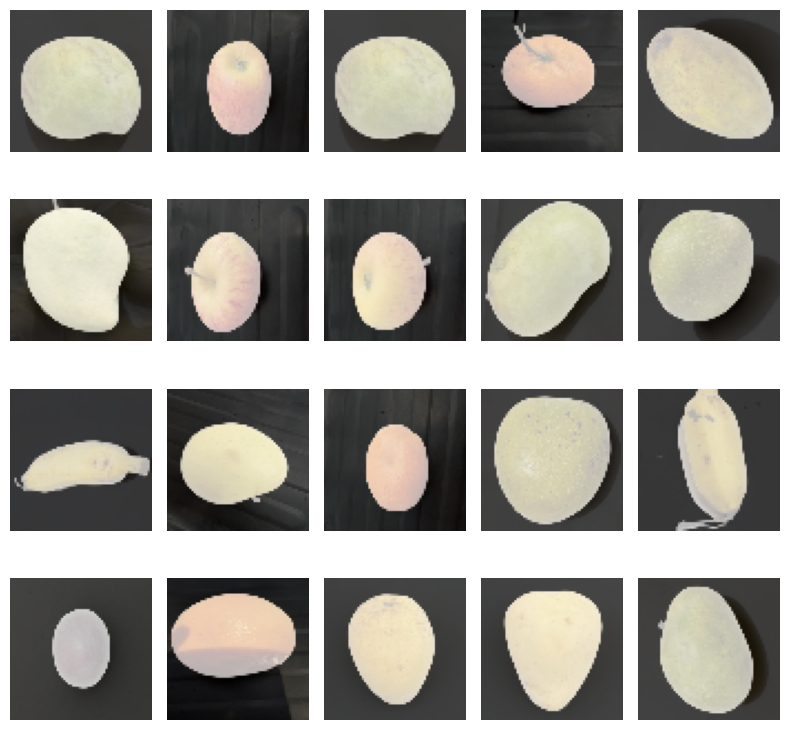

In [12]:
plt.figure(figsize=(8,8))
for i in range(20):
    plt.subplot(4,5,i+1)
    id = np.random.randint(len(images))
    show_mask(images[id], masks[id], cmap="gray", alpha=0.7)
plt.tight_layout()
plt.show()

In [13]:
len(images), len(masks)

(751, 751)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
image_train, image_test, mask_train, mask_test = train_test_split(image_paths, mask_paths, test_size=0.10, random_state=RANDOM_STATE)
image_train, image_val, mask_train, mask_val  = train_test_split(image_train, mask_train, test_size=0.10, random_state=RANDOM_STATE)

In [16]:
train_img_paths = image_train
val_img_paths = image_val
test_img_paths = image_test

train_mask_paths = mask_train
val_mask_paths = mask_val
test_mask_paths = mask_test

In [17]:
len(image_train), len(image_val), len(image_test)

(607, 68, 76)

In [18]:
import json

In [19]:
with open("./paths/train_img_paths.json", "w") as f:
    json.dump(train_img_paths, f)

with open("./paths/val_img_paths.json", "w") as f:
    json.dump(val_img_paths, f)

with open("./paths/test_img_paths.json", "w") as f:
    json.dump(test_img_paths, f)

with open("./paths/train_mask_paths.json", "w") as f:
    json.dump(train_mask_paths, f)

with open("./paths/val_mask_paths.json", "w") as f:
    json.dump(val_mask_paths, f)

with open("./paths/test_mask_paths.json", "w") as f:
    json.dump(test_mask_paths, f)

In [20]:
with open(f"./results-med/{RUN}/paths/train_img_paths.json", "w") as f:
    json.dump(train_img_paths, f)

with open(f"./results-med/{RUN}/paths/val_img_paths.json", "w") as f:
    json.dump(val_img_paths, f)

with open(f"./results-med/{RUN}/paths/test_img_paths.json", "w") as f:
    json.dump(test_img_paths, f)

with open(f"./results-med/{RUN}/paths/train_mask_paths.json", "w") as f:
    json.dump(train_mask_paths, f)

with open(f"./results-med/{RUN}/paths/val_mask_paths.json", "w") as f:
    json.dump(val_mask_paths, f)

with open(f"./results-med/{RUN}/paths/test_mask_paths.json", "w") as f:
    json.dump(test_mask_paths, f)